# Image Transformations and Morphological Operations
** SPI2 - Ecole Centrale Nantes **

** Diana Mateus **

Participants: (FILL IN YOUR NAMES AND LASTNAMES)

## 1. Preparation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage.io as io
import numpy.random


### 1.2. Read and display the images in the provided folders

Download and unzip the images folder.  Loop over the images and show them on the screen. 

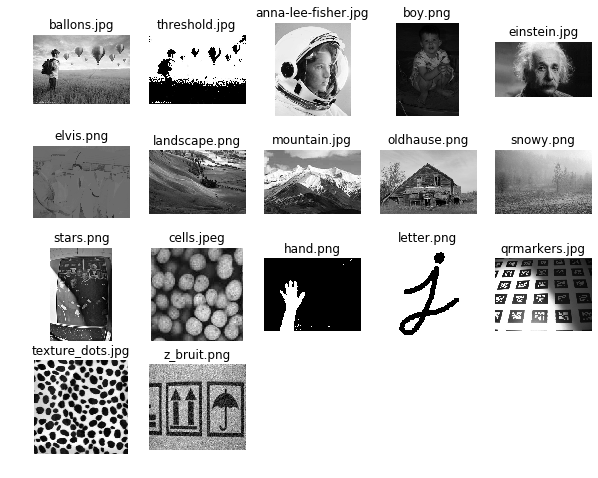

In [2]:
IMDIR = "./images" #"/Replace/With/Your/Filepath"
           
width=10
height=10
plt.rcParams['figure.figsize'] = [width, height]

fig=plt.figure()

im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            
            # print the paths to current filename if nothing is being found
            # print(filename)
            
            # read the image 
            im = io.imread(f,as_gray=True)
            
            # display it
            plt.subplot(5,5,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1 


plt.show()



# 2. Intensity transformations and Histograms

### 2.1 Threshold
Create a function that receives a grayscale image and given a parameter ```k``` implements a threshold function Apply and show the result on the ```threshold.jpg``` image.Show the results for different values of ```k```. **Hint**: you may want to use the ```np.where``` function


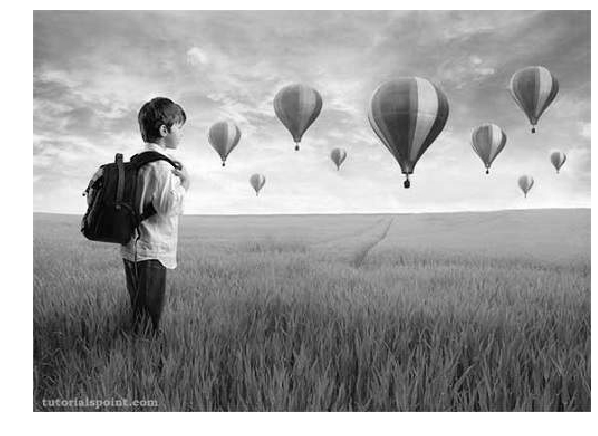

In [3]:
im = io.imread('images/ballons.jpg',as_gray=True)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

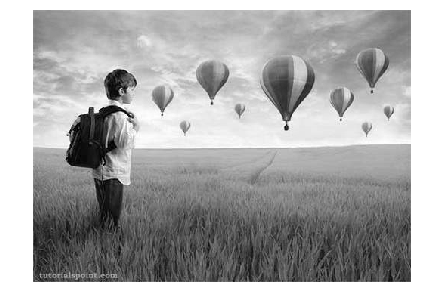

E:\ananconda\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
E:\ananconda\lib\site-packages\skimage\io\_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


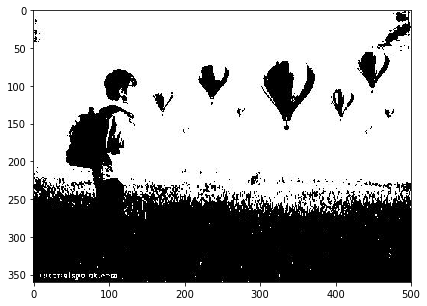

In [6]:
im = io.imread('images/ballons.jpg',as_gray=True)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

def threshold(input_im,th):
    output_im = np.where(input_im>th,1,0)
    return output_im

output_im = threshold(im,0.5).astype('float32')

io.imsave('images/threshold.jpg', output_im)

im = io.imread('images/threshold.jpg', as_grey=True)
plt.imshow(im, cmap='gray')



### 2.3 Graylevel transformations and transfer functions

Implement the following graylevel transformations as independent functions. Then apply the functions to the images in the 
```
histograms
``` 
folder. Display the original and the transformed results side to side

**a)** Implement a generic linear transformation parameterized by ```a``` and ```b``` such that its transfer function has the form 

```f(x) = a x + b``` 

**b)** Implement a function that inverts the image intensities

**c)** Implement  a ```contrast_normalization``` function that stretches the histogram to fill the full available span.

**Optional advanced variant**  consider the contrast normalization with an additional saturation by making the transfer function  **piecewise linear**.  Saturate the 5% of the darkest and 5% of the brightest pixels, such that all values before min_intensity should be saturated to 0 and all above max_intensity to 1.0


**Hint** Use the following lines to compute the intensity at which the 5% is reached
```
min_intensity=stats.scoreatpercentile(image,5)
max_intensity=stats.scoreatpercentile(image,95)
```

**(d)** Plot the transfer functions for all transformations in (a) to (d)

**(e)** Loop over the images and display the results for each image with subplot in three lines:
- The second displaying the original and the transformed images.
- The bottom row showing the resulting histograms. 

**Hints** 
- set the horizontal limits fo the histograms to ```set_lim([0 255])```
- Make sure that the histograms associated to a single figure have comparable vertical axis limits. 


./images/histograms\anna-lee-fisher.jpg
2


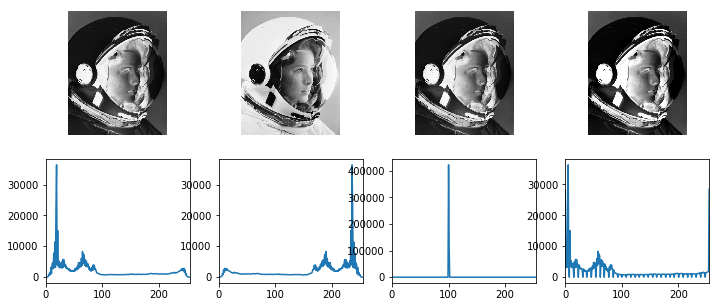

[[101 102 103 ...  76  79  82]
 [101 102 103 ...  76  78  81]
 [101 102 102 ...  76  77  79]
 ...
 [ 32  32  32 ...  98  98  98]
 [ 32  32  32 ... 101 101 101]
 [ 32  32  32 ...  94  94  94]]
[[ 99.48430493 100.62780269 101.77130045 ...  70.89686099  74.32735426
   77.75784753]
 [ 99.48430493 100.62780269 101.77130045 ...  70.89686099  73.1838565
   76.61434978]
 [ 99.48430493 100.62780269 100.62780269 ...  70.89686099  72.04035874
   74.32735426]
 ...
 [ 20.58295964  20.58295964  20.58295964 ...  96.05381166  96.05381166
   96.05381166]
 [ 20.58295964  20.58295964  20.58295964 ...  99.48430493  99.48430493
   99.48430493]
 [ 20.58295964  20.58295964  20.58295964 ...  91.47982063  91.47982063
   91.47982063]]
0
255
0.0
255.0
./images/histograms\boy.png
2


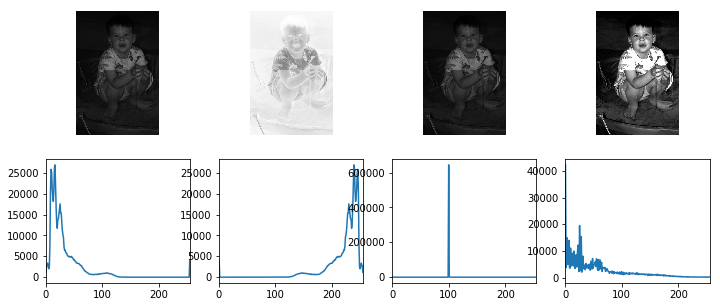

[[255.     255.       7.8578 ...   9.3549 255.     255.    ]
 [255.     255.       7.8578 ...   9.3549 255.     255.    ]
 [255.     255.       7.8578 ...   9.3549 255.     255.    ]
 ...
 [255.     255.       7.0779 ...  24.7985 255.     255.    ]
 [255.     255.      10.0779 ...  31.7985 255.     255.    ]
 [255.     255.      10.0779 ...  31.7985 255.     255.    ]]
[[255.         255.           0.         ...   3.18003883 255.
  255.        ]
 [255.         255.           0.         ...   3.18003883 255.
  255.        ]
 [255.         255.           0.         ...   3.18003883 255.
  255.        ]
 ...
 [255.         255.           0.         ...  52.29128657 255.
  255.        ]
 [255.         255.           5.47920691 ...  74.55155841 255.
  255.        ]
 [255.         255.           5.47920691 ...  74.55155841 255.
  255.        ]]
0.0
255.0
0.0
255.00000000000003
./images/histograms\einstein.jpg
2


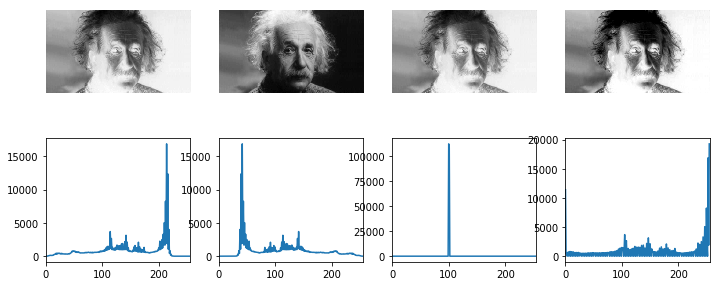

[[170 170 171 ... 196 187 179]
 [170 170 171 ... 198 190 183]
 [169 170 170 ... 202 195 189]
 ...
 [ 90  97 106 ... 221 216 212]
 [ 83  91 101 ... 218 213 209]
 [ 76  85  96 ... 215 210 206]]
[[187.5862069  187.5862069  189.05172414 ... 225.68965517 212.5
  200.77586207]
 [187.5862069  187.5862069  189.05172414 ... 228.62068966 216.89655172
  206.63793103]
 [186.12068966 187.5862069  187.5862069  ... 234.48275862 224.22413793
  215.43103448]
 ...
 [ 70.34482759  80.60344828  93.79310345 ... 255.         255.
  249.13793103]
 [ 60.0862069   71.81034483  86.46551724 ... 255.         250.60344828
  244.74137931]
 [ 49.82758621  63.01724138  79.13793103 ... 253.53448276 246.20689655
  240.34482759]]
1
226
0.0
255.0
./images/histograms\elvis.png
2


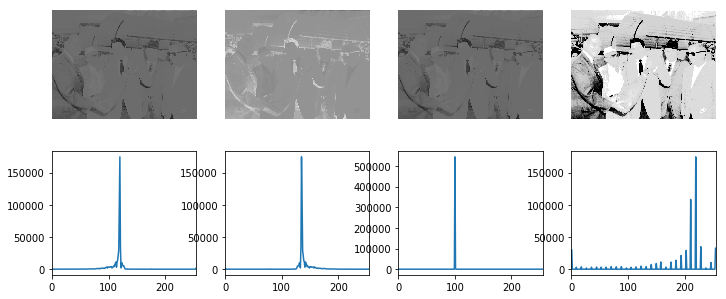

[[255. 255. 255. ... 255. 255. 255.]
 [217. 176. 176. ... 219. 227. 255.]
 [189. 120. 120. ... 144. 157. 255.]
 ...
 [179. 101.  99. ... 119. 133. 255.]
 [177.  97.  97. ... 119. 133. 255.]
 [176.  96.  96. ... 119. 133. 255.]]
[[255.         255.         255.         ... 255.         255.
  255.        ]
 [255.         255.         255.         ... 255.         255.
  255.        ]
 [255.         219.82758621 219.82758621 ... 255.         255.
  255.        ]
 ...
 [255.          52.75862069  35.17241379 ... 211.03448276 255.
  255.        ]
 [255.          17.5862069   17.5862069  ... 211.03448276 255.
  255.        ]
 [255.           8.79310345   8.79310345 ... 211.03448276 255.
  255.        ]]
20.0
255.0
0.0
255.0
./images/histograms\landscape.png
2


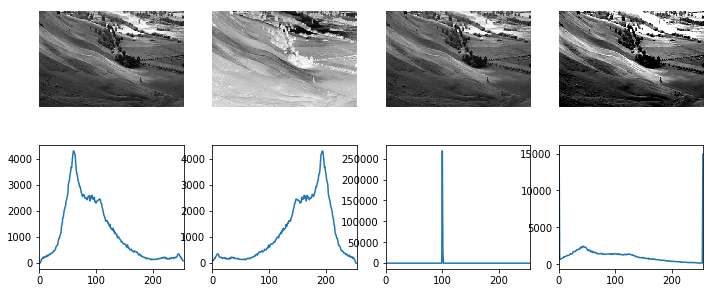

[[ 88.2882  83.3603  51.3621 ... 150.158  147.3743 147.3743]
 [ 86.3603  81.5045  53.0775 ... 136.2357 132.2395 132.2395]
 [ 70.5784  68.5784  60.3621 ...  54.203   44.201   42.9885]
 ...
 [ 47.0823  47.0823  48.2986 ...  87.1649  85.9466  85.8745]
 [ 46.5852  46.5852  48.2265 ...  79.8062  78.3033  78.3033]
 [ 46.5852  46.5852  48.2265 ...  78.9466  77.5158  77.4437]]
[[ 91.6582766   82.87396121  25.8350033  ... 201.94538394 196.98325022
  196.98325022]
 [ 88.22166432  79.56587206  28.89281994 ... 177.12794159 170.00444454
  170.00444454]
 [ 60.08935907  56.52422366  41.87811263 ...  30.89909989  13.06985771
   10.90849437]
 ...
 [ 18.20597004  18.20597004  20.37410713 ...  89.6559183   87.48421606
   87.35569293]
 [ 17.31985563  17.31985563  20.245584   ...  76.53853733  73.85951633
   73.85951633]
 [ 17.31985563  17.31985563  20.245584   ...  75.00624213  72.45574426
   72.32722113]]
1.3699
254.85580000000002
0.0
255.0
./images/histograms\mountain.jpg
2


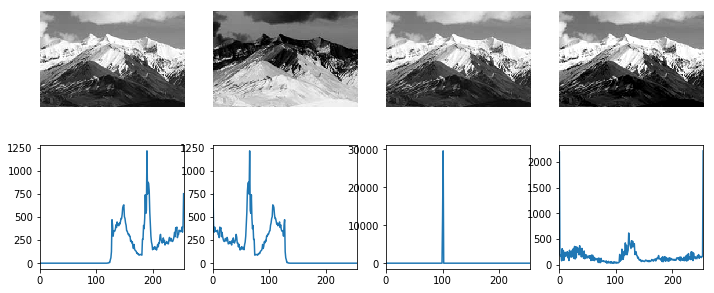

[[215.1554 214.1554 212.5842 ... 210.7304 211.7304 211.7304]
 [219.5083 218.1554 216.1554 ... 209.7304 211.7304 211.7304]
 [221.5083 218.5083 216.1554 ... 207.7304 211.7304 211.7304]
 ...
 [152.5029 151.5029 149.5029 ... 131.     132.     132.    ]
 [150.5029 149.5029 149.5029 ... 131.     134.     134.    ]
 [150.5029 150.5029 150.5029 ... 131.     133.     133.    ]]
[[178.75705184 176.60162548 173.21501959 ... 169.2192902  171.37471656
  171.37471656]
 [188.13940723 185.22333091 180.91247819 ... 167.06386385 171.37471656
  171.37471656]
 [192.45025994 185.98398087 180.91247819 ... 162.75301113 171.37471656
  171.37471656]
 ...
 [ 43.71420196  41.5587756   37.24792289 ...   0.           0.
    0.        ]
 [ 39.40334925  37.24792289  37.24792289 ...   0.           3.83256361
    3.83256361]
 [ 39.40334925  39.40334925  39.40334925 ...   0.           1.67713725
    1.67713725]]
119.8652
255.0
0.0
255.0
./images/histograms\oldhause.png
2


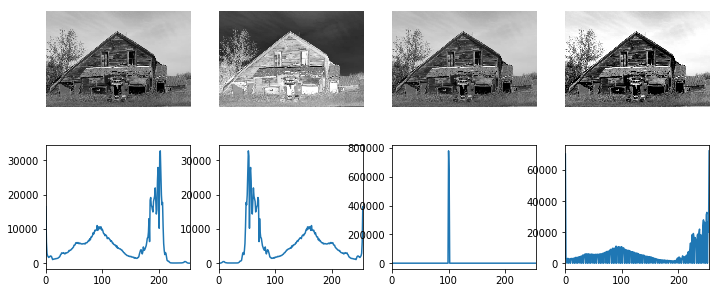

[[  1.   1.   1. ...   1.   1.   1.]
 [  0.   1.   2. ...   0.   0.   0.]
 [  1.   1.   3. ...   2.   0.   0.]
 ...
 [  0.   7.  61. ... 120.  39.   2.]
 [  2.  11.  71. ... 118.  39.   2.]
 [  5.  16.  78. ... 115.  37.   1.]]
[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [  0.           0.          47.2752809  ... 131.79775281  15.75842697
    0.        ]
 [  0.           0.          61.6011236  ... 128.93258427  15.75842697
    0.        ]
 [  0.           0.          71.62921348 ... 124.63483146  12.89325843
    0.        ]]
0.0
254.0
0.0
255.0
./images/histograms\snowy.png
2


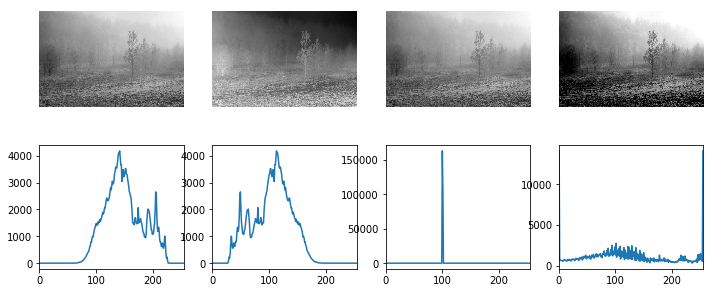

[[174.5692 174.3567 174.3567 ... 176.     176.     176.    ]
 [145.9471 148.9471 144.8067 ... 225.4156 225.4156 225.4156]
 [142.1538 148.4442 147.0192 ... 226.4156 226.4156 226.4156]
 ...
 [ 77.2391  88.8103  91.448  ...  77.0951  78.0951  74.448 ]
 [ 75.6623  81.7382  76.0931 ...  92.8143  90.8864  78.6681]
 [ 94.2982  67.0154  83.8065 ...  92.3701 104.723  124.148 ]]
[[176.26575077 175.77054043 175.77054043 ... 179.60008938 179.60008938
  179.60008938]
 [109.56476323 116.55596802 106.90717325 ... 255.         255.
  255.        ]
 [100.72485085 115.38400906 112.06318678 ... 255.         255.
  255.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.          13.49605477
   58.76410578]]
49.1442
228.4156
0.0
255.0
./images/histograms\stars.png
2


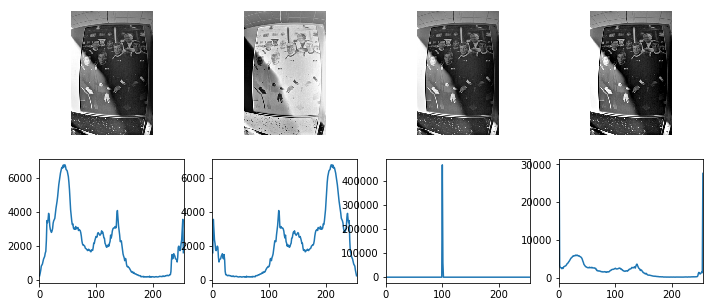

[[147.4011 146.4011 141.9723 ...  83.3     71.5125  69.3   ]
 [145.329  144.329  139.9723 ...  87.0154  75.3     73.3   ]
 [132.1886 131.4011 127.7598 ... 105.0154  95.0875  93.8029]
 ...
 [  2.273    7.1326  37.573  ...  20.6     21.3817  22.1692]
 [  0.5009   0.573    6.4326 ...  14.5297  18.9605  18.9605]
 [  0.2884   0.3605   1.2201 ...  14.3172  17.9605  18.0326]]
[[148.6988176  147.56416252 142.5390021  ...  75.96617882  62.59143206
   60.0810077 ]
 [146.34769881 145.21304373 140.26969194 ...  80.18187631  66.88893818
   64.61962802]
 [131.43787719 130.54433631 126.41271677 ... 100.60566776  89.34092558
   87.88334767]
 ...
 [  0.           0.          24.08180596 ...   4.82330528   5.71026516
    6.60380603]
 [  0.           0.           0.         ...   0.           2.96303828
    2.96303828]
 [  0.           0.           0.         ...   0.           1.8283832
    1.91019183]]
0.0
255.0
0.0
255.0


In [7]:
#Idea for next use also the code from TD to do a smooth thresholding and animate with a widget 
#TODO: ask to show the shape of the transfer function

width=15
height=5
plt.rcParams['figure.figsize'] = [width, height]

from scipy import stats
from scipy.special import expit

IMDIR = "./images/histograms"


def invert(source):

    #FILL IN
    out = 255 - source
    
    return out

def linear (source, a=1/255, b=100):

    #FILL IN
    out = a*source + b

    return out


def contrast_norm(source):
    # maybe noise or the normalization wrong
    # filter to replace the noise
    
    #FILL IN
    # Opt
    min_intensity = stats.scoreatpercentile(source,5)
    max_intensity = stats.scoreatpercentile(source,95)
    
    source = np.where(source < min_intensity, min_intensity, source)
    source = np.where(source > max_intensity, max_intensity, source)
    
    max = float(np.max(source))
    min = float(np.min(source))
    
    out = (source - min)*255/(max - min)
    
    return out

    
# LOOPING OVER IMAGES
for filename in os.listdir(IMDIR):
    f = os.path.join(IMDIR, filename)
    print(f)


    if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):

        im = io.imread(f,as_gray=True)
        im = im *255
        print(len(im.shape))
        if len(im.shape)>2:
            im_gray = rgb2gray(im)
        else:
            im_gray = im
                
        #original
        hist, bins = np.histogram(im_gray, bins=256, range=(0,255))
        bins = 0.5*(bins[:-1] + bins[1:])
                
        plt.subplot(2, 5, 1)
        plt.imshow(im_gray,cmap='gray')
        plt.axis('off')
            
        ax=plt.subplot(2, 5, 6)                
        plt.plot(bins,hist)
        ax.set_xlim([0,255])

    
        #inverted
        im_gray_invert = invert(im_gray)
        hist, bins = np.histogram(im_gray_invert, bins=256, range=(0,255))
        bins = 0.5*(bins[:-1] + bins[1:])
        
        
        plt.subplot(2, 5, 2)
        plt.imshow(im_gray_invert, cmap='gray')
        plt.axis('off')
            
        ax=plt.subplot(2, 5, 7)                
        plt.plot(bins,hist)
        ax.set_xlim([0,255])


        #linear
        im_gray_lin = linear(im_gray)
        hist, bins = np.histogram(im_gray_lin, bins=256, range=(0,255))
        bins = 0.5*(bins[:-1] + bins[1:])
        
        
        plt.subplot(2, 5, 3)
        plt.imshow(im_gray_lin,cmap='gray')
        plt.axis('off')
            
        ax=plt.subplot(2, 5, 8)                
        plt.plot(bins,hist)
        ax.set_xlim([0,255])
            
        
        #contrast normalization
        im_gray_con = contrast_norm(im_gray)
        hist, bins = np.histogram(im_gray_con, bins=256, range=(0,255))
        bins = 0.5*(bins[:-1] + bins[1:])
        
        
        
        plt.subplot(2, 5, 4)
        plt.imshow(im_gray_con,cmap='gray')
        plt.axis('off')
            
        ax=plt.subplot(2, 5, 9)                
        plt.plot(bins,hist)
        ax.set_xlim([0,255])

        #image show 
        plt.show()
        print(im_gray)
        print(im_gray_con)
        print(np.min(im_gray))
        print(np.max(im_gray))
        
        print(np.min(im_gray_con))
        print(np.max(im_gray_con))

In [13]:
# Transfer functions

In [ ]:
#Linear:  y = a*x + b
#Invert:  y = 255 - x
#Contrast normalization: y = 255 * [x - min(x)] / [max(x) - min(x)]

### 2.4 Histogram equalization

Implement the histogram equalization algorithm and apply it to the images in the histogram folder. Display the original and the equalized image, the original and the equalized histograms, as well as the original and resultant **cumulative** histograms. 

**Write down a comment about your findings** Explain the shape of the histograms and cumulative histograms before and after the transformation


In [ ]:
width=15
height=5
plt.rcParams['figure.figsize'] = [width, height]

from scipy import stats
from scipy.special import expit

IMDIR = "./images/histograms"


def invert(source):

    #FILL IN
    out = 255 - source
    
    return out

def linear (source, a=1/255, b=100):

    #FILL IN
    out = a*source + b

    return out


def contrast_norm(source):
    # maybe noise or the normalization wrong
    # filter to replace the noise
    
    #FILL IN
    # Opt
    min_intensity = stats.scoreatpercentile(source,25)
    max_intensity = stats.scoreatpercentile(source,75)
    
    source = np.where(source < min_intensity, min_intensity, source)
    source = np.where(source > max_intensity, max_intensity, source)
    
    max = float(np.max(source))
    min = float(np.min(source))
    
    out = (source - min)*255/(max - min)
    
    return out

    
# LOOPING OVER IMAGES
for filename in os.listdir(IMDIR):
    f = os.path.join(IMDIR, filename)
    print(f)


    if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):

        im = io.imread(f,as_gray=True)
        im = im *255
        print(len(im.shape))
        if len(im.shape)>2:
            im_gray = rgb2gray(im)
        else:
            im_gray = im
                
        #original
        hist, bins = np.histogram(im_gray, bins=256, range=(0,255))
        bins = 0.5*(bins[:-1] + bins[1:])
                
        plt.subplot(2, 5, 1)
        plt.imshow(im_gray,cmap='gray')
        plt.axis('off')
            
        ax=plt.subplot(2, 5, 6)                
        plt.plot(bins,hist)
        ax.set_xlim([0,255])

    
        #inverted
        im_gray_invert = invert(im_gray)
        hist, bins = np.histogram(im_gray_invert, bins=256, range=(0,255))
        bins = 0.5*(bins[:-1] + bins[1:])
        
        
        plt.subplot(2, 5, 2)
        plt.imshow(im_gray_invert, cmap='gray')
        plt.axis('off')
            
        ax=plt.subplot(2, 5, 7)                
        plt.plot(bins,hist)
        ax.set_xlim([0,255])


        #linear
        im_gray_lin = linear(im_gray)
        hist, bins = np.histogram(im_gray_lin, bins=256, range=(0,255))
        bins = 0.5*(bins[:-1] + bins[1:])
        
        
        plt.subplot(2, 5, 3)
        plt.imshow(im_gray_lin,cmap='gray')
        plt.axis('off')
            
        ax=plt.subplot(2, 5, 8)                
        plt.plot(bins,hist)
        ax.set_xlim([0,255])
            
        
        #contrast normalization
        im_gray_con = contrast_norm(im_gray)
        hist, bins = np.histogram(im_gray_con, bins=256, range=(0,255))
        bins = 0.5*(bins[:-1] + bins[1:])
        
        
        
        plt.subplot(2, 5, 4)
        plt.imshow(im_gray_con,cmap='gray')
        plt.axis('off')
            
        ax=plt.subplot(2, 5, 9)                
        plt.plot(bins,hist)
        ax.set_xlim([0,255])

        #image show 
        plt.show()
        print(im_gray)
        print(im_gray_con)
        print(np.min(im_gray))
        print(np.max(im_gray))
        
        print(np.min(im_gray_con))
        print(np.max(im_gray_con))

## 3.0 Morphological operations


Loop over the images in the ```morphology``` folder. Apply the following morphological operations to the images by first converting them to grayscale: 

**a)** erosion

**b)** dilation

**c)** closure

**d)** opening

**e)** border extraction

**f)** Apply the filters to the original gray scale images. 
- Explain the results for the binary as well as for the grayscale images. 
- What is the effect of the structuring element shape?

Hints: use the scikit help for morphological operations.  For instance to declare an structuring element use
```python
# declare an structuring elment
selem = disk(6)
# apply a scipy morphological operation
eroded_im = erosion(im, selem)
```


['cells.jpeg', 'hand.png', 'letter.png', 'qrmarkers.jpg', 'texture_dots.jpg', 'z_bruit.png']


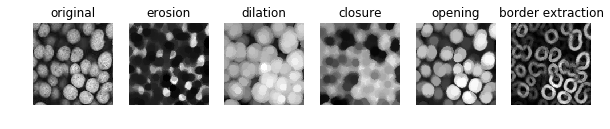

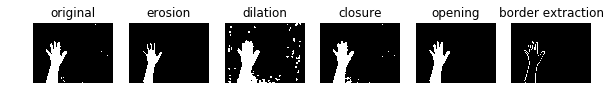

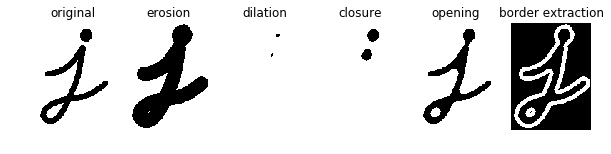

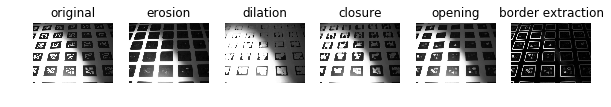

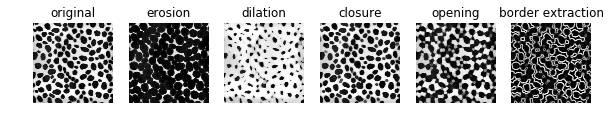

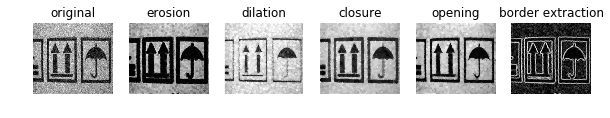

In [18]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
IMDIR = "./images/morphology"


def morpho_plot(ax, image, filter_name):

    ax.imshow(image, cmap=plt.cm.gray)
    ax.set_title(filter_name)
    ax.axis('off')
    #ax.set_adjustable('box-forced')

selem = disk(6)

for root, dirnames, filenames in os.walk(IMDIR):
    # print path to all filenames. 
    print(filenames)
    for filename in filenames:
        f = os.path.join(root, filename)
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            #print(f)
            fig, (axs) = plt.subplots(ncols=6, figsize=(10, 2), sharex=True,
                                   sharey=True)

            im = io.imread(f,as_gray=True)

            morpho_plot(axs[0],im,'original')
                        
            #FILL IN
            #erosion
            eroded_im = erosion(im, selem)
            morpho_plot(axs[1],eroded_im,'erosion')
            
            #dilation
            dilated_im = dilation(im, selem)
            morpho_plot(axs[2],dilated_im,'dilation')
            
            #closure
            closure_im = closing(im, selem)
            morpho_plot(axs[3],closure_im,'closure')
            
            #opening
            opened_im = opening(im, selem)
            morpho_plot(axs[4],opened_im,'opening')
            
            #border extraction
            border = opened_im - eroded_im
            morpho_plot(axs[5],border,'border extraction')
            
            plt.show()